In [219]:
import pandas as pd
births = pd.read_csv("Dataset-Pro.csv") 
print(births.head())
births['day'].fillna(0, inplace=True) 
births['day'] = births['day'].astype(int)


   year  month  day gender  birth
0  1996      1    2      F   4046
1  1969      3    1      M   4440
2  1958      5    3      F   4458
3  1965      8    1      M   4459
4  1986      2    2      F   4456


In [220]:
births['decade'] = 10 * (births['year'] // 10)
births.head()

,year,month,day,gender,birth,decade
0,1996,1,2,F,4046,1990
1,1969,3,1,M,4440,1960
2,1958,5,3,F,4458,1950
3,1965,8,1,M,4459,1960
4,1986,2,2,F,4456,1980


In [221]:
births.pivot_table('birth',index='decade', columns='gender',aggfunc='sum')
print(births.head())

   year  month  day gender  birth  decade
0  1996      1    2      F   4046    1990
1  1969      3    1      M   4440    1960
2  1958      5    3      F   4458    1950
3  1965      8    1      M   4459    1960
4  1986      2    2      F   4456    1980


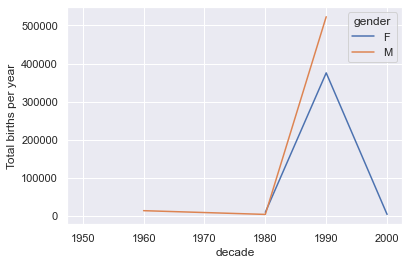

In [222]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 
birth_decade = births.pivot_table('birth', index='decade', columns='gender', aggfunc='sum') 
birth_decade.plot() 
plt.ylabel("Total births per year") 
plt.show()

In [223]:
import numpy as np
quartiles = np.percentile(births['birth'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [224]:
births = births.query('(birth > @mu - 5 * @sig) & (birth < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

C:\Users\ACER\AppData\Local\Temp\ipykernel_16228\2157032431.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


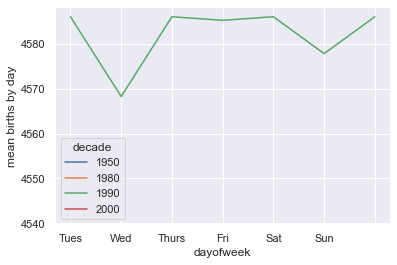

In [225]:
births.pivot_table('birth', index='dayofweek',columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

In [226]:
births_month = births.pivot_table('birth', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

           birth
1 2  4562.333333
  3  4586.000000
  4  4586.000000
  5  4585.229730
  6  4570.200000
                  birth
2012-01-02  4562.333333
2012-01-03  4586.000000
2012-01-04  4586.000000
2012-01-05  4585.229730
2012-01-06  4570.200000


C:\Users\ACER\AppData\Local\Temp\ipykernel_16228\3218039039.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day)


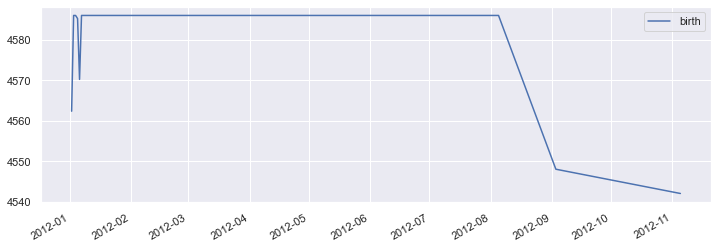

In [227]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()